1099919 Christopher Tineo Reyes

# Asignación 3

In [1]:
# Importar dependencias

import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1.   Utilizando el dataset de “house prices.csv” construir un modelo usando regresión lineal simple y múltiple.

In [2]:
df = read_csv('house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


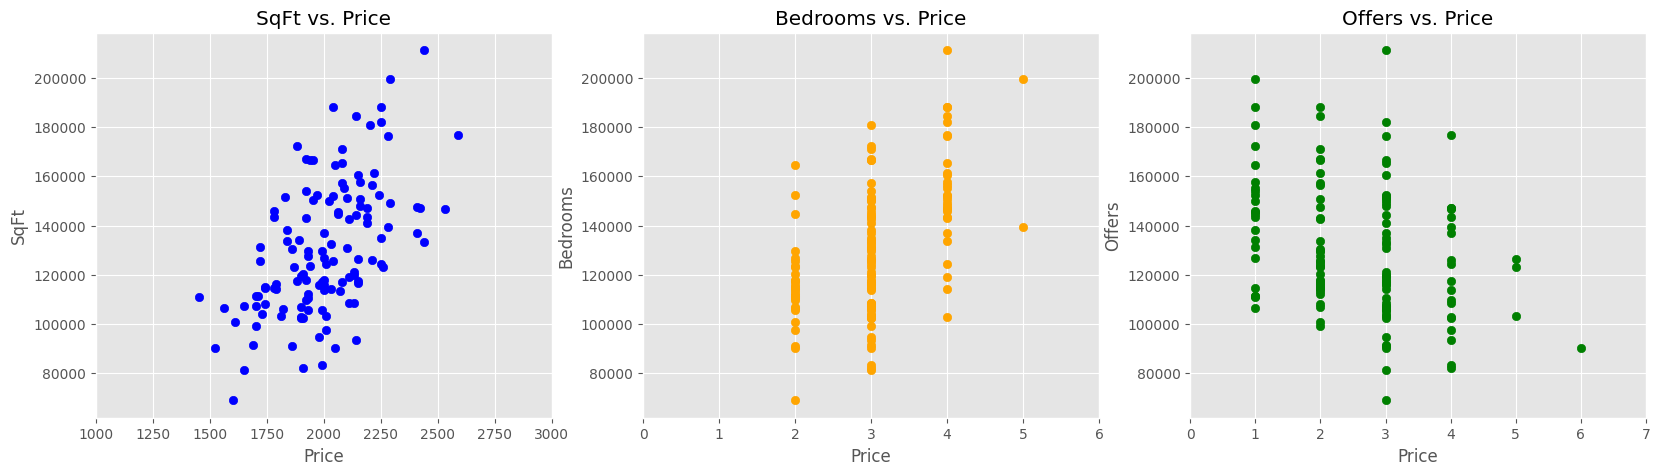

In [3]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 5))

ax1.scatter(df['SqFt'], df['Price'], c ="blue")
ax1.set_xlim(1000,3000)
ax1.set_title('SqFt vs. Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('SqFt')

ax2.scatter(df['Bedrooms'], df['Price'], c ="orange")
ax2.set_xlim(0,6)
ax2.set_title('Bedrooms vs. Price')
ax2.set_xlabel('Price')
ax2.set_ylabel('Bedrooms')

ax3.scatter(df['Offers'], df['Price'], c ="green")
ax3.set_xlim(0,7)
ax3.set_title('Offers vs. Price')
ax3.set_xlabel('Price')
ax3.set_ylabel('Offers')

#plt.tight_layout()
plt.show()

2. Para cada variable independiente realizar un diagrama de dispersión.

3. Dividir el dataset en 70% para entrenamiento y 30% para prueba.

4. Realizar la visualización de los resultados obtenidos por los modelos.

5. Evaluar los valores pronosticado con las métricas r cuadrado y r cuadrado ajustado.

6. Compare los resultados de utilizar cada uno de los modelos.

7. Entregar un reporte de los resultados obtenidos.